#Linear Regression with StatsModels with Pandas

In [19]:
%pylab inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Last time we had a bit of a time with forcing us to use numpy arrays... but StatsModels can deal with pandas dataframes

In [3]:
import pandas as pd

mammals = pd.read_csv(u'../mammals.csv')

In [4]:
mammals.head()

,Name,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


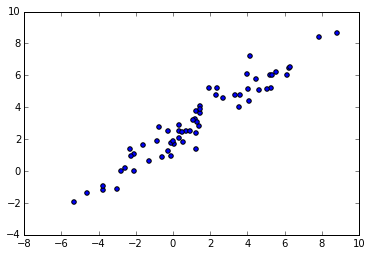

In [5]:
from numpy import log

mammals['log_body']=log(mammals['body'])
mammals['log_brain']=log(mammals['brain']) 

plt.scatter(mammals['log_body'], mammals['log_brain'])

In [6]:
mammals.head()

,Name,body,brain,log_body,log_brain
0,Arctic fox,3.385,44.5,1.219354,3.795489
1,Owl monkey,0.480,15.5,-0.733969,2.740840
2,Mountain beaver,1.350,8.1,0.300105,2.091864
3,Cow,465.000,423.0,6.142037,6.047372
4,Grey wolf,36.330,119.5,3.592644,4.783316


# Using linear regression with pandas

In [7]:
body_data = mammals['body']
print body_data.shape

brain_data = mammals['brain']
print brain_data.shape

(62,)
(62,)


In [8]:
body_data= sm.add_constant(body_data)
print body_data.shape

(62, 2)


In [9]:
regression1 = sm.OLS(brain_data, body_data).fit()
print regression1.summary()

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Tue, 26 May 2015   Prob (F-statistic):           1.54e-28
Time:                        21:42:46   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.0

In [10]:
log_body_data = mammals['log_body']

log_brain_data = mammals['log_brain']

log_body_data= sm.add_constant(log_body_data)

regression2 = sm.OLS(log_brain_data, log_body_data).fit()
print regression2.summary()

                            OLS Regression Results                            
Dep. Variable:              log_brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 26 May 2015   Prob (F-statistic):           9.84e-35
Time:                        21:42:48   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.1348      0.096     22.227      0.0

In [14]:
mammals['predict']=regression1.predict(body_data)

In [16]:
mammals['log_predict']=np.exp(regression2.predict(log_body_data))


In [17]:
mammals.head()

,Name,body,brain,log_body,log_brain,predict,log_predict
0,Arctic fox,3.385,44.5,1.219354,3.795489,94.275986,21.144078
1,Owl monkey,0.480,15.5,-0.733969,2.740840,91.468314,4.869905
2,Mountain beaver,1.350,8.1,0.300105,2.091864,92.309166,10.594903
3,Cow,465.000,423.0,6.142037,6.047372,540.425207,855.487784
4,Grey wolf,36.330,119.5,3.592644,4.783316,126.117209,125.879932


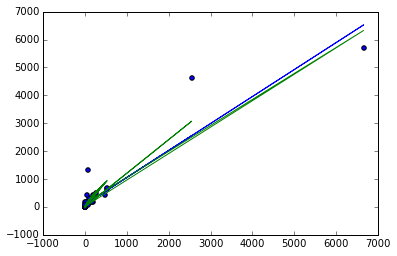

In [22]:
plt.scatter(mammals['body'], mammals['brain'])
plt.plot(mammals['body'], mammals['predict'], color='blue')
plt.plot(mammals['body'], mammals['log_predict'],color = 'green')

We need to sort the data

In [24]:
# sorting by response
mammals = mammals.sort('brain')

# sorting by prediction
mammals_log_sort = mammals.sort('log_predict')

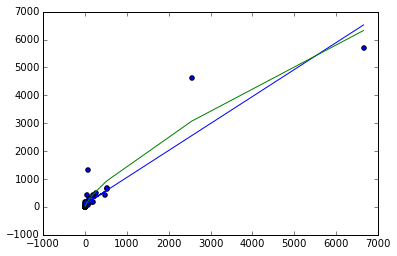

In [25]:
plt.scatter(mammals['body'], mammals['brain'])
plt.plot(mammals['body'], mammals['predict'], color='blue')
plt.plot(mammals_log_sort['body'], mammals_log_sort['log_predict'],color = 'green')